22/11/2019

The code here is close to Nielsen. Each activation is treated as a column vector, even the last one which for XOR is just a simple number and is encloded in a shape (1,1) column vector of just one row, i.e if activation value of output neuron is a, then it is computed as np.array([[a]]).

Can easily adapt code here for the MLP excercises and the Iris classification problem.
But you may need to use more than 2 hidden neurons and more than 1 output neuron.

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
def sigm(z):
    return  1.0/(1.0 + np.exp(-z))

def sigm_deriv(z):
    a = sigm(z)
    return a*(1 - a)

In [128]:
class XOR_MLP:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # hidden layer of 2 neurons
        self.w2 = np.random.randn(2,2)
        self.b2 = np.random.randn(2,1)
        
        # output layer has 1 neuron
        self.w3 = np.random.randn(1,2)
        self.b3 = np.random.randn(1,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):   # Assumed here that input vectors are rows in xs
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):               # for zip to work, each x in xs must be a row vector
            a1 = x.reshape(2,1)              # convert input row vector x into (2,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
                
                
            
    

[[0.13441229 0.10816814 0.14522425 0.12453942]]


[[0.01637589 0.98586233 0.98585688 0.01459916]]


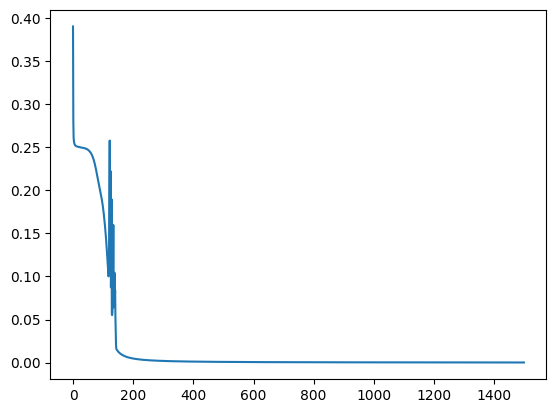

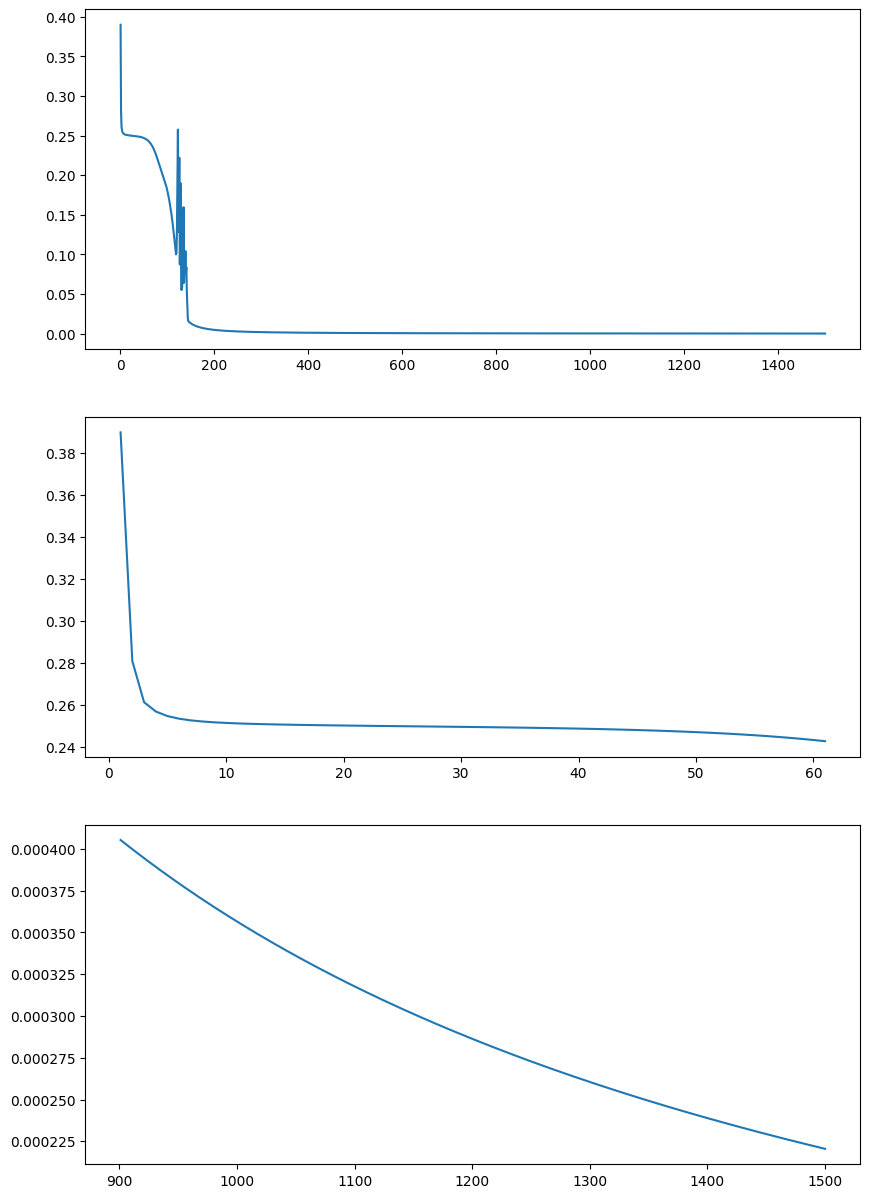

In [129]:
xor = XOR_MLP()
xs = xor.train_inputs.T

print(xor.feedforward(xs))

epochs = 1500
c = xor.train(epochs, 18)

print(xor.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])





Exercise 1: copy and adapt the above XOR_MLP code so that it uses 3 neurons in the hidden layer. Train such a MLP and see if it learns faster than the previous one.

[[0.75101667 0.72275956 0.82197731 0.79600709]]
[[0.06170503 0.94737644 0.94695574 0.05410433]]


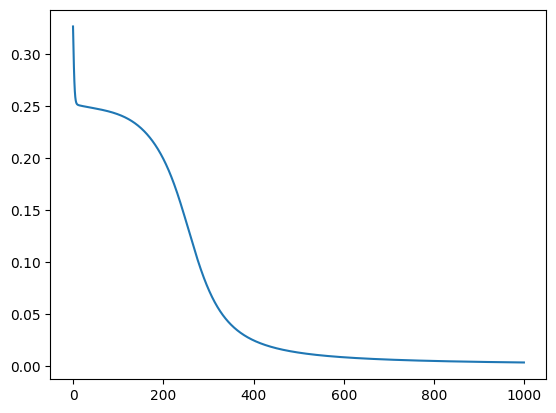

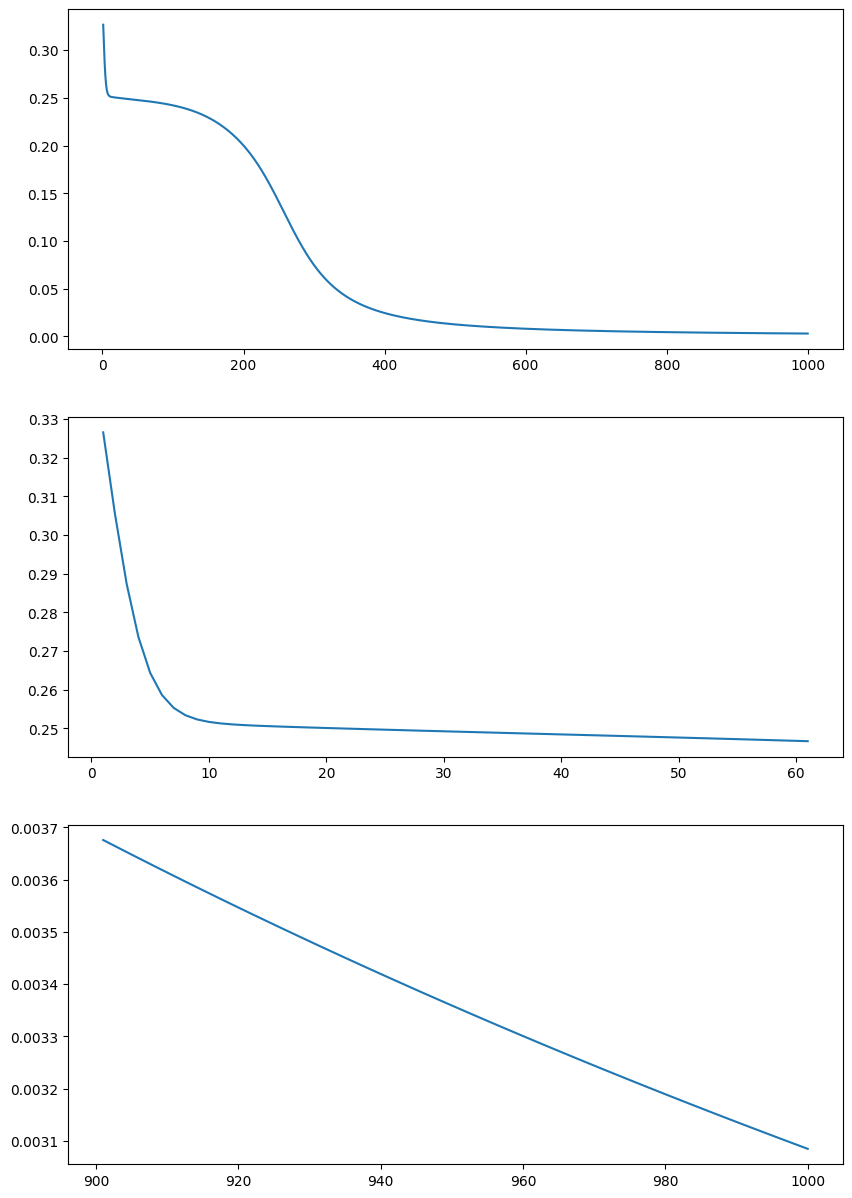

In [130]:
# Exercise 1
class XOR_MLP2:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # hidden layer of 3 neurons
        self.w2 = np.random.randn(3,2)
        self.b2 = np.random.randn(3,1)
        
        # output layer has 1 neuron
        self.w3 = np.random.randn(1,3)
        self.b3 = np.random.randn(1,1)
    
    def feedforward(self, xs):
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)
        return a3s
    
    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):
            a1 = x.reshape(2,1)
            z2 = self.w2.dot(a1) + self.b2
            a2 = sigm(z2)
            
            z3 = self.w3.dot(a2) + self.b3
            a3 = sigm(z3)
            
            delta3 = (a3-y) * sigm_deriv(z3)
            
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))
            
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)
            
            cost += ((a3 - y)**2).sum()
        
        n = len(ys)
        
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
    
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
    
xor2 = XOR_MLP2()
xs = xor2.train_inputs.T

print(xor2.feedforward(xs))

epochs = 1000

c = xor2.train(epochs, 3.0)

print(xor2.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)

fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])

plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])
plt.show()

In [131]:
# A more general purpose MLP with m input neurons, n hidden neurons and o output neurons
# You must complete this code yourself
class MLP:
    def __init__(self, input, output, m, n, o):
        self.train_inputs = input
        self.train_outputs = output
        self.m = m
        self.n = n
        self.o = o
          
        np.random.seed(23)
        # hidden layer of N neurons
        self.w2 = np.random.randn(n,m)
        self.b2 = np.random.randn(n,1)
        
        # output layer has O neurons but code is incorrect
        # code here needs to be modified
        self.w3 = np.random.randn(o,n)
        self.b3 = np.random.randn(o,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):            
            a1 = x.reshape(self.m,1)              # convert input vector x into (2,1) column vector
            y = y.reshape(self.o,1) 

            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            a2 = a2.reshape(self.n,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
        
    def pretty_print_feedforward(self, xs):
        a3s = self.feedforward(xs)
        for x, a3 in zip(xs.T, a3s.T):
            print(f'Input: {x} Output: {a3}')

    def predict(self,xs):
        return self.feedforward(xs)
         

In [132]:
# A more general purpose MLP with m input neurons, n hidden neurons and o output neurons
# You must complete this code yourself
class MLP_CrossEntropy:
    def __init__(self, input, output, m, n, o):
        self.train_inputs = input
        self.train_outputs = output
        self.m = m
        self.n = n
        self.o = o
          
        np.random.seed(23)
        # hidden layer of N neurons
        self.w2 = np.random.randn(n,m)
        self.b2 = np.random.randn(n,1)
        
        # output layer has O neurons but code is incorrect
        # code here needs to be modified
        self.w3 = np.random.randn(o,n)
        self.b3 = np.random.randn(o,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    def fn (self, a , y):
        if a.shape != y.shape:
            y = y.T
        return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))

    def delta(self , z , a, y):
        return (a-y)
    
    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):            
            a1 = x.reshape(self.m,1)              # convert input vector x into (2,1) column vector
            y = y.reshape(self.o,1) 

            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            a2 = a2.reshape(self.n,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = self.delta(z3,a3, y)              # (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
            xs_transposed = xs.T
            cost = self.fn(self.feedforward(xs_transposed), ys)     #= ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
        
    def pretty_print_feedforward(self, xs):
        a3s = self.feedforward(xs)
        for x, a3 in zip(xs.T, a3s.T):
            print(f'Input: {x} Output: {a3}')

    def predict(self,xs):
        return self.feedforward(xs)

In [133]:
# Are the outputs of these correct?
p1 = MLP(3,4,2)
print('\n W2 = \n',p1.w2, '\n W3 = \n', p1.w3, '\n')

p2 = MLP(4,6,3)
print('\n W2 = \n', p2.w2, '\nW3 = \n', p2.w3, '\n')


TypeError: MLP.__init__() missing 2 required positional arguments: 'n' and 'o'

[[0.4321933  0.52195082 0.43163385 0.51250656]]
[[0.00852193 0.98145772 0.9823636  0.02319393]]


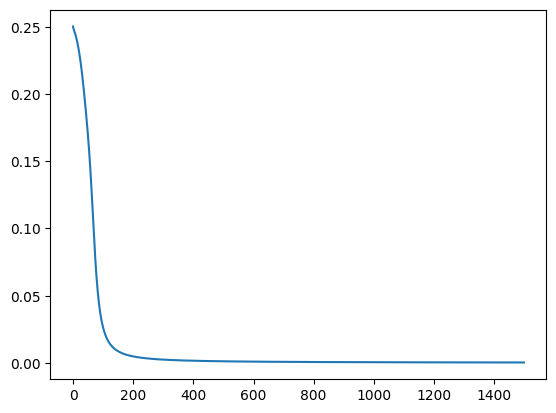

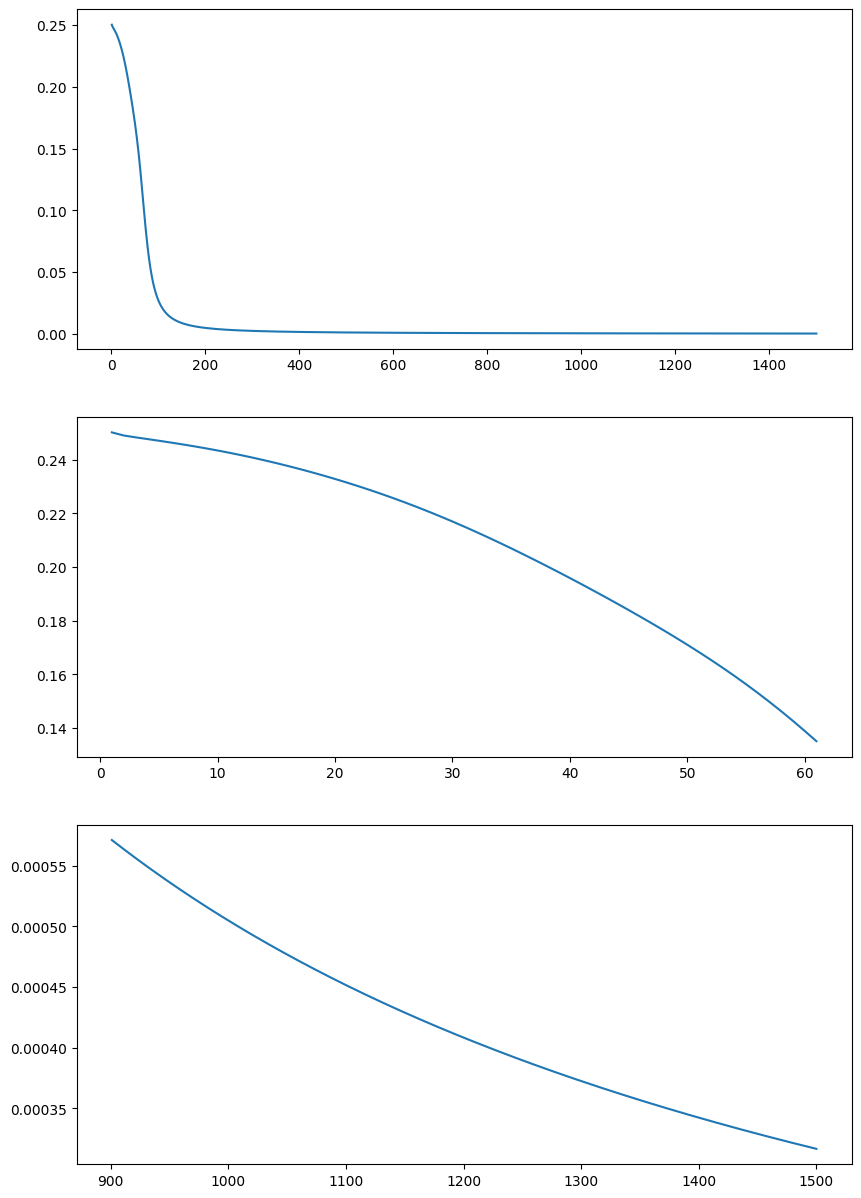

In [134]:
## Problem 1
inputs = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
outputs = np.array([0,1,1,0])
mlp = MLP(inputs,outputs,3,4,1)
xs = mlp.train_inputs.T

print(mlp.feedforward(xs))

epochs = 1500
c = mlp.train(epochs, 11) # 12 unstable, 11 max stable

print(mlp.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])

[[0.70408509 0.7180619  0.67639097 0.74472101 0.73399458 0.73871309
  0.68953045]
 [0.28166198 0.51696896 0.07160192 0.15441416 0.40235951 0.52317756
  0.14660275]]
[[0.97559584 0.05539692 0.9993942  0.99895826 0.98936668 0.95184106
  0.99179888]
 [0.05694845 0.9815941  0.96097824 0.04547392 0.01121991 0.95977132
  0.95470151]]


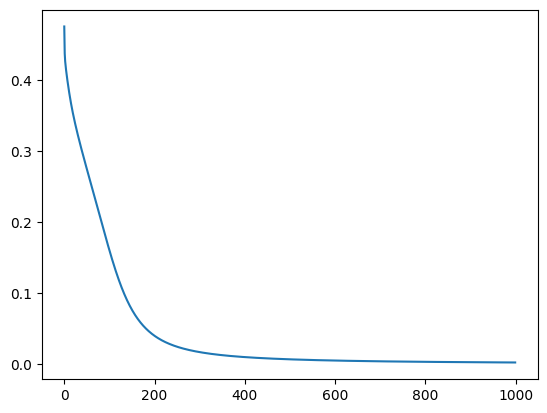

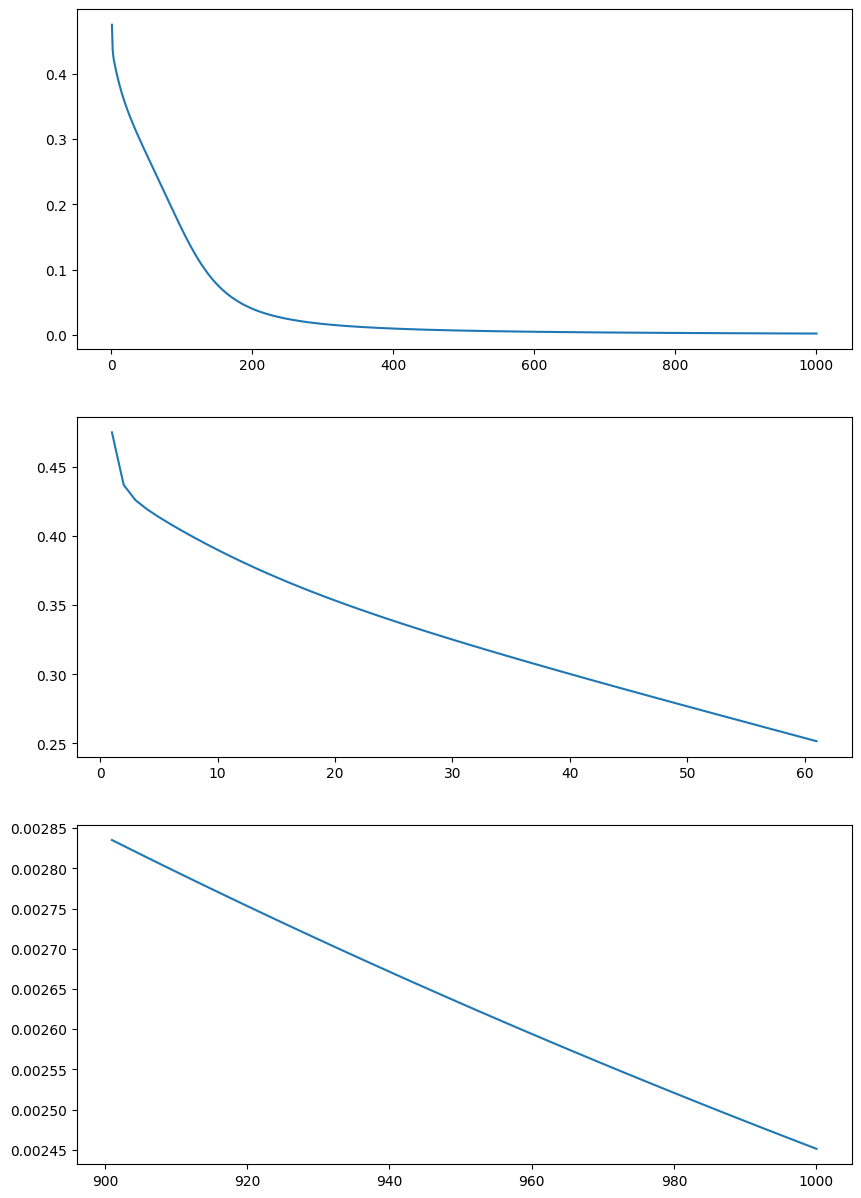

In [135]:
#Problem 2 Neural Network with 3 input and 2 output neurons
inputs = np.array([[1,1,0], [1,-1,-1], [-1,1,1], [-1,-1,1], [0,1,-1], [0,-1,-1], [1,1,1]])

outputs = np.array([[1,0], [0,1], [1,1], [1,0], [1,0], [1,1], [1,1]])

q2_mlp = MLP(inputs, outputs,3,10,2)

xs = q2_mlp.train_inputs.T

print(q2_mlp.feedforward(xs))

epochs = 1000
c = q2_mlp.train(epochs,3)

print(q2_mlp.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])



# testiing of epochs lower than 1000
# x_axis = np.linspace(1, epochs, epochs, dtype=int)
# fig, axs = plt.subplots(3, 1, figsize=(10, 15))
# plt.subplot(3, 1, 1)
# plt.plot(x_axis, c[:epochs])
# plt.title('Training Cost Over Epochs')
# plt.subplot(3, 1, 2)
# plt.plot(x_axis[:epochs//5], c[:epochs//5])
# plt.title('Training Cost - Early Epochs')
# plt.subplot(3, 1, 3)
# plt.plot(x_axis[-epochs//5:], c[-epochs//5:epochs])
# plt.title('Training Cost - Later Epochs')
# plt.tight_layout()
# plt.show()



In [ ]:
# Problem 3 Trasportation

# Gender
## Male 0
## Female 1

# Car ownership (Number of cars that a person owns)

#Travel Cost
## 0 Cheap 
## 1 Standard
## 2 expensive 

# Income
## 0 Low
## 1 Medium 
## 2 High

# Output 
## Bus [1,0,0]
## Train [0,1,0] 
## Car [0,0,1]




[[0.62461055 0.69167448 0.68072763 0.523616   0.69167448 0.71217801
  0.67277245 0.7162704  0.66976071 0.67770052]
 [0.42794555 0.43016417 0.45847018 0.48047544 0.43016417 0.26281926
  0.34763902 0.25067736 0.28981606 0.28170545]
 [0.3052477  0.23944034 0.21912008 0.26576102 0.23944034 0.16847249
  0.20981777 0.12868963 0.31511057 0.17716801]]
[[9.98519662e-01 9.77119038e-01 3.35176231e-02 9.78744550e-01
  9.77119038e-01 1.86254488e-02 3.50261413e-03 1.13711686e-04
  7.51449993e-04 7.58499285e-05]
 [6.31646780e-03 2.23004789e-02 9.61376135e-01 3.92895523e-02
  2.23004789e-02 9.62849629e-01 9.60874830e-01 4.12253203e-02
  1.38317635e-02 2.22855808e-02]
 [5.56974046e-04 2.11957398e-03 4.43968783e-03 3.69570457e-04
  2.11957398e-03 1.55999766e-02 2.85198117e-02 9.70045612e-01
  9.86555181e-01 9.86601402e-01]]

[[0.00122817]
 [0.47256666]
 [0.37919056]]


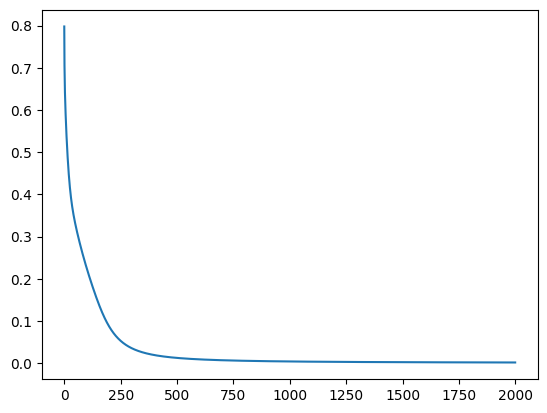

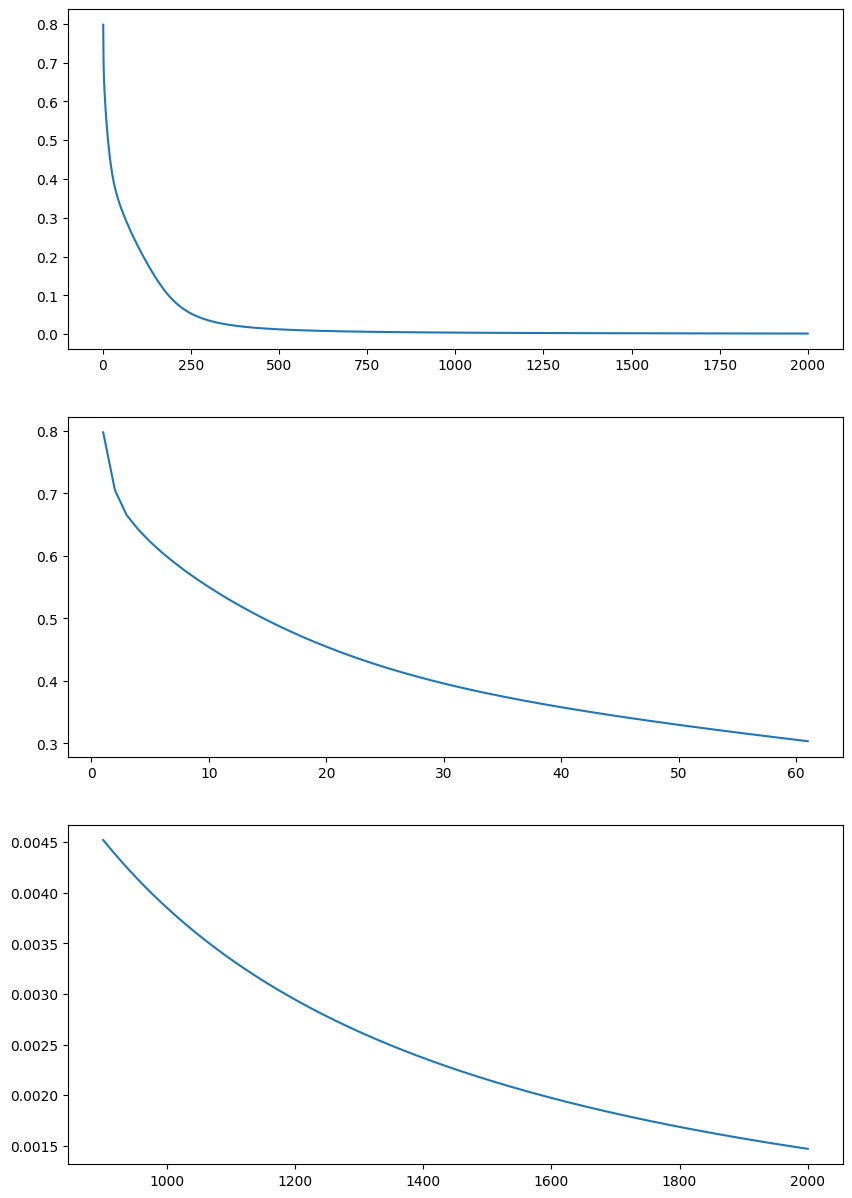

In [136]:
inputs= np.array([[0,0,0,0], [0,1,0,1], [1,1,0,1], [1,0,0,0], [0,1,0,1], [0,0,1,1], [1,1,1,1], [1,1,2,2], [0,2,2,1], [1,2,2,2]])
outputs = np.array([[1,0,0], [1,0,0], [0,1,0], [1,0,0], [1,0,0], [0,1,0], [0,1,0], [0,0,1], [0,0,1], [0,0,1]])
p3_mlp = MLP(inputs, outputs,4,7,3)

xs = p3_mlp.train_inputs.T

print(p3_mlp.feedforward(xs))

epochs = 2000
c = p3_mlp.train(epochs, 3.0) 

print(p3_mlp.feedforward(xs))

print()
xs = np.array([1,0,2,1]).reshape(4,1)
print(p3_mlp.predict(xs))


x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])


df = pd.DataFrame(p3_mlp.train_inputs)
df.to_csv('transport.csv', index=False, header=False, sep=',')

[[0.56094346 0.53376829 0.5605878  0.55700372 0.57152951 0.574173
  0.57913735 0.55784935 0.55441951 0.5341772  0.55965157 0.5654577
  0.5318706  0.56213196 0.56478775 0.59117393 0.58222375 0.56592136
  0.55524706 0.58003456 0.53576457 0.5781781  0.59075867 0.55932204
  0.56144888 0.52689183 0.56540535 0.55523127 0.54883393 0.55771179
  0.54599235 0.55081166 0.58677148 0.58606816 0.5341772  0.54516674
  0.54087361 0.5341772  0.56192511 0.55306169 0.57130192 0.50864175
  0.57414291 0.57656716 0.57361333 0.5471059  0.57589699 0.56439851
  0.56402741 0.5517776  0.55024432 0.56522657 0.56321172 0.57756927
  0.57317007 0.57118709 0.57171574 0.56111212 0.55231864 0.58453931
  0.55775075 0.57521985 0.52853246 0.57054727 0.565631   0.55464278
  0.58151083 0.54296154 0.58749763 0.55444784 0.59232831 0.55851364
  0.5860035  0.55806681 0.55357379 0.55781974 0.56068459 0.58479232
  0.57761517 0.53845872 0.5562663  0.5456888  0.55680509 0.5957111
  0.58504366 0.57250733 0.56455637 0.56128786 0.5664

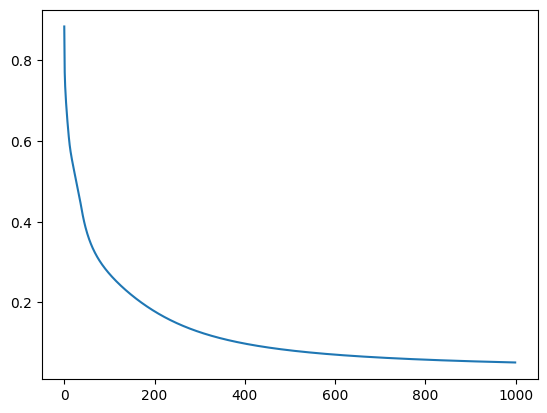

In [137]:
# Problem 4 Iris

df = pd.read_csv('iris_data.csv', header=None)

outputs = df.iloc[:,-1]

outputs = pd.get_dummies(outputs)
outputs = outputs.to_numpy()

outputs = outputs.astype(int)

df =  df.drop(df.columns[-1], axis=1)

inputs =  df.to_numpy()

inputs = inputs.astype(float)

xs = inputs.T

p4_mlp = MLP(inputs, outputs,4,7,3)

print(p4_mlp.predict(xs))

epochs = 1000
c = p4_mlp.train(epochs, 0.8)
print("cost: " + str(c[-1]))
p4_mlp.pretty_print_feedforward(xs)



Final cost: 0.19509301562293255
Input: [5.1 3.5 1.4 0.2] Output: [9.91930345e-01 1.56209421e-02 6.27221593e-04]
Input: [4.9 3.  1.4 0.2] Output: [9.88723505e-01 2.05023259e-02 7.21231392e-04]
Input: [4.7 3.2 1.3 0.2] Output: [9.91510802e-01 1.66960374e-02 6.39360779e-04]
Input: [4.6 3.1 1.5 0.2] Output: [9.89585803e-01 2.01093455e-02 6.95816364e-04]
Input: [5.  3.6 1.4 0.2] Output: [9.92335040e-01 1.51643492e-02 6.14102270e-04]
Input: [5.4 3.9 1.7 0.4] Output: [9.91746899e-01 1.55954715e-02 6.32209982e-04]
Input: [4.6 3.4 1.4 0.3] Output: [9.91843921e-01 1.63472827e-02 6.28280865e-04]
Input: [5.  3.4 1.5 0.2] Output: [9.91171431e-01 1.70107353e-02 6.51077283e-04]
Input: [4.4 2.9 1.4 0.2] Output: [9.88936687e-01 2.13166217e-02 7.12230660e-04]
Input: [4.9 3.1 1.5 0.1] Output: [9.89121408e-01 2.03327056e-02 7.11820046e-04]
Input: [5.4 3.7 1.5 0.2] Output: [9.92015008e-01 1.52438459e-02 6.25027450e-04]
Input: [4.8 3.4 1.6 0.2] Output: [9.90871149e-01 1.80117889e-02 6.59755776e-04]
Input: [

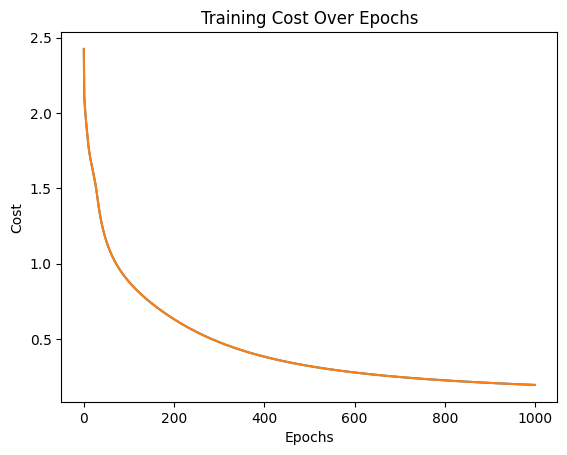

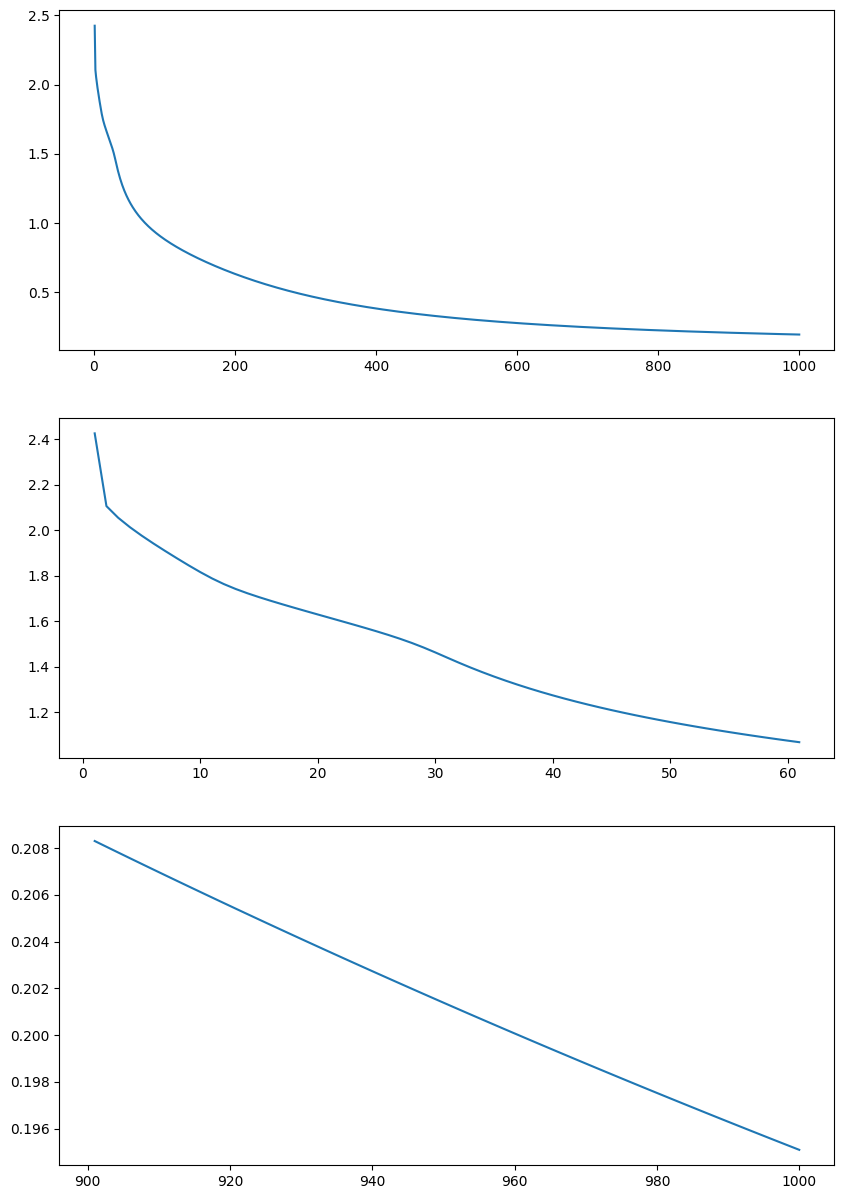

In [138]:
# Problem 4 iris with cross entropy

# Load the dataset
df = pd.read_csv('iris_data.csv', header=None)


outputs = df.iloc[:,-1]
outputs = pd.get_dummies(outputs)
outputs = outputs.to_numpy()
outputs = outputs.astype(int)


df = df.drop(df.columns[-1], axis=1)
inputs = df.to_numpy()
inputs = inputs.astype(float)


xs = inputs.T

p4_mlp_cross = MLP_CrossEntropy(inputs, outputs, 4, 7, 3)  

# Train the model
epochs = 1000
c = p4_mlp_cross.train(epochs, 0.19)
print("Final cost: " + str(c[-1]))

print(MLP_CrossEntropy.pretty_print_feedforward(p4_mlp_cross, xs))


plt.plot(c)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training Cost Over Epochs')
x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])
plt.show()


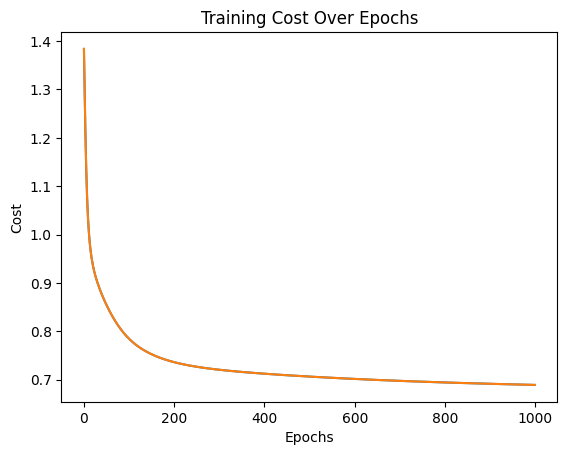

Accuracy on the testing set: 0.91


In [139]:
# My  own data set diabetes risk prediction

df = pd.read_csv('diabetes_risk_prediction_dataset.csv')

binary_columns = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 
                  'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 
                  'Itching', 'Irritability', 'delayed healing', 'partial paresis', 
                  'muscle stiffness', 'Alopecia', 'Obesity', 'class']


binary_mapping = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Positive': 1, 'Negative': 0}
for col in binary_columns:
    df[col] = df[col].map(binary_mapping)


# Split the data into features and labels train and test sets
X = df.drop('class', axis=1)
y = df['class']

np.random.seed(42) 
shuffled_indices = np.random.permutation(len(df))
train_set_size = int(len(df) * 0.7)

train_indices = shuffled_indices[:train_set_size]
test_indices = shuffled_indices[train_set_size:]

train_set = df.iloc[train_indices]
test_set = df.iloc[test_indices]

X_train_manual = train_set.drop('class', axis=1)
y_train_manual = train_set['class']
X_test_manual = test_set.drop('class', axis=1)
y_test_manual = test_set['class']

# z = x - μ / σ 

# Calculate mean and standard deviation for each feature in the training set
means_X = X_train_manual.mean()
stds_X = X_train_manual.std()

# Normalize training data
X_train_manual_normalized = (X_train_manual - means_X) / stds_X
X_test_manual_normalized = (X_test_manual - means_X) / stds_X

means_Y = y_train_manual.mean()
stds_Y = y_train_manual.std()

y_train_manual_normalized = (y_train_manual - means_Y) / stds_Y
y_test_manual_normalized = (y_test_manual - means_Y) / stds_Y

X_train_manual_normalized = np.array(X_train_manual_normalized)
X_test_manual_normalized = np.array(X_test_manual_normalized)

y_train_manual_normalized = np.array(y_train_manual_normalized).reshape(-1, 1)
y_test_manual_normalized = np.array(y_test_manual_normalized).reshape(-1, 1)

X_train_manual_normalized = X_train_manual_normalized.T 


y_train_manual_normalized = y_train_manual_normalized.reshape(1, -1)  


mlp_model = MLP(input=X_train_manual_normalized.T, output=y_train_manual_normalized.T, m=16, n=10, o=1)


# Train the model
epochs = 1000
learning_rate = 0.35
training_cost = mlp_model.train(epochs=epochs, eta=learning_rate)



plt.plot(training_cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training Cost Over Epochs')
plt.show()


X_test_manual_normalized_transposed = X_test_manual_normalized.T
y_pred = mlp_model.predict(X_test_manual_normalized_transposed)

# Since y_pred is the output of a sigmoid function, it will be in the range [0,1].
# Convert these probabilities to binary labels based on a threshold (e.g., 0.5).
y_pred_labels = (y_pred > 0.5).astype(int)



accuracy = np.mean(y_pred_labels == y_test_manual.values) 


print(f'Accuracy on the testing set: {accuracy:.2f}')







